In [1]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

import os

import cv2
from PIL import Image
from skimage import io
import scipy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from keras.utils import np_utils

Using TensorFlow backend.


In [146]:
opencv_haar_path = "/home/hantz_angrand72/master620/opencv/data/haarcascades/haarcascade_frontalface_default.xml"





def create_data_set(x_crop= 150, y_crop=150, train_size=.8): 

    """ Load the Yale Faces data set, extract the faces on the images and generate labels for each image.

        

        Returns: Train and validation samples with their labels. The training samples are flattened arrays 

        of size 22500 (150 * 150) , the labels are one-hot-encoded values for each category

    """

    images_path = [ os.path.join("yalefaces", item)  for item in  os.listdir("yalefaces") ]

    image_data = []

    image_labels = []

    

    for i,im_path in enumerate(images_path):

        im = io.imread(im_path,0)

#        if( i== 10) or (i==40) or (i==50):

#            io.imshow(im)

#            io.show()

        image_data.append(np.array(im, dtype='uint8'))

        

        

        

        label = int(os.path.split(im_path)[1].split(".")[0].replace("subject", ""))  -1

       

            

        image_labels.append(label)

    faceDetectClassifier = cv2.CascadeClassifier(opencv_haar_path)

    

    cropped_faces = []

    for im in image_data:

        facePoints = faceDetectClassifier.detectMultiScale(im)

        x,y = facePoints[0][:2]

        cropped = im[y: y + y_crop, x: x + x_crop]

        cropped_faces.append(cropped/255)

        

    X_ = np.array(cropped_faces).astype('float32')

    enc = LabelEncoder()

    y_ = enc.fit_transform(np.array(image_labels))

    #y_ = np_utils.to_categorical(y_)

   
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, train_size=train_size, random_state = 22)
    return X_train, X_test, y_train, y_test
    #return (X_train).reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2])), (X_test).reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2])), (y_train).reshape((y_train.shape[0]*y_train.shape[1]),1), (y_test).reshape((y_test.shape[0]*y_test.shape[1]),1)

In [147]:
X_train, X_test, y_train, y_test=create_data_set()

In [148]:
(np.shape(X_train),np.shape(y_train))

((132, 150, 150), (132,))

In [149]:
print("Train Shape:", np.shape(X_train), np.shape(y_train))
print("Testt shape:", np.shape(X_test), np.shape(y_test))

Train Shape: (132, 150, 150) (132,)
Testt shape: (34, 150, 150) (34,)


In [150]:
y_train=y_train.astype('uint8')

In [151]:
y_train

array([ 8,  0,  3,  6,  3,  5,  1, 14,  1, 13,  7, 14,  4,  4,  1,  5,  8,
       14, 13,  2,  8, 13,  7, 12,  2, 13, 13,  5, 12, 10,  9,  6, 14,  0,
        7,  7, 12,  2,  9,  4,  0,  6, 12, 14, 10, 13,  8,  5,  2,  4,  9,
        5,  4,  7, 10,  6,  1, 11, 14,  1, 13, 12,  7,  5,  2,  3,  2,  0,
       11,  9,  9, 11, 11,  4,  3,  8,  2,  6,  1,  1, 13, 11,  6, 14,  6,
        0,  8, 13,  7, 10,  0,  1,  9,  1, 10,  0, 14,  1,  0, 10, 14,  5,
        9, 10,  3, 13,  9, 12, 14,  9,  9,  3, 11,  4, 10, 11,  2, 11,  8,
        3, 10,  8,  6, 11,  2,  7,  6, 12,  5, 12,  4, 10], dtype=uint8)

In [152]:
y_test=y_test.astype('uint8')


In [153]:
 #Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  15
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


Text(0.5, 1.0, 'Ground Truth : 3')

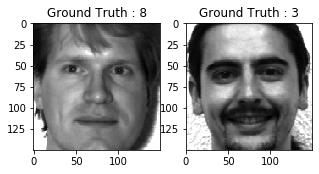

In [155]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[1,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[1,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[0]))

In [185]:
train_X = X_train.reshape(-1, 150,150, 1)
test_X = X_test.reshape(-1, 150,150, 1)

train_X.shape, test_X.shape

((132, 150, 150, 1), (34, 150, 150, 1))

In [187]:
#train_X = train_X.astype('float32')
#test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [188]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 8
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [189]:
np.shape(train_X), np.shape(y_train)

((132, 150, 150, 1), (132,))

In [190]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [191]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((105, 150, 150, 1), (27, 150, 150, 1), (105, 15), (27, 15))

In [192]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [193]:
batch_size = 64
epochs = 20
num_classes = 15

In [194]:
face_model = Sequential()
face_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(150,150,1),padding='same'))
face_model.add(LeakyReLU(alpha=0.15))
face_model.add(MaxPooling2D((2, 2),padding='same'))
face_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
face_model.add(LeakyReLU(alpha=0.15))
face_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
face_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
face_model.add(LeakyReLU(alpha=0.15))                  
face_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
face_model.add(Flatten())
face_model.add(Dense(128, activation='linear'))
face_model.add(LeakyReLU(alpha=0.15))                  
face_model.add(Dense(num_classes, activation='softmax'))

In [195]:
face_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [196]:
face_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 38, 38, 128)       73856     
__________

In [197]:
face_train = face_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 105 samples, validate on 27 samples
Epoch 1/20
105/105 [==============================] - 3s 30ms/step - loss: 2.7082 - acc: 0.0571 - val_loss: 2.7131 - val_acc: 0.0370
Epoch 2/20
105/105 [==============================] - 1s 9ms/step - loss: 2.7112 - acc: 0.0667 - val_loss: 2.7175 - val_acc: 0.0000e+00
Epoch 3/20
105/105 [==============================] - 1s 9ms/step - loss: 2.7053 - acc: 0.0952 - val_loss: 2.7226 - val_acc: 0.0000e+00
Epoch 4/20
105/105 [==============================] - 1s 9ms/step - loss: 2.7038 - acc: 0.0952 - val_loss: 2.7380 - val_acc: 0.0000e+00
Epoch 5/20
105/105 [==============================] - 1s 9ms/step - loss: 2.7014 - acc: 0.0952 - val_loss: 2.7612 - val_acc: 0.0000e+00
Epoch 6/20
105/105 [==============================] - 1s 9ms/step - loss: 2.7044 - acc: 0.0952 - val_loss: 2.7541 - val_acc: 0.0000e+00
Epoch 7/20
105/105 [==============================] - 1s 9ms/step - loss: 2.7003 - acc: 0.0952 - val_loss: 2.7693 - val_acc: 0.0000e+00
Epoch 

In [130]:
#Evaluation
y_test=y_test.reshape(34,15)

In [199]:
test_eval = face_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [200]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 2.7680838528801415
Test accuracy: 0.029411764705882353


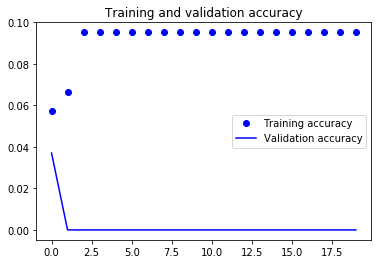

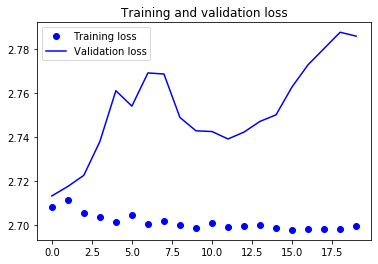

In [201]:
accuracy = face_train.history['acc']
val_accuracy = face_train.history['val_acc']
loss = face_train.history['loss']
val_loss = face_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [202]:
predicted_classes = face_model.predict(test_X)

In [203]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [204]:
predicted_classes.shape, y_test.shape

((34,), (34,))

Found 4 correct labels


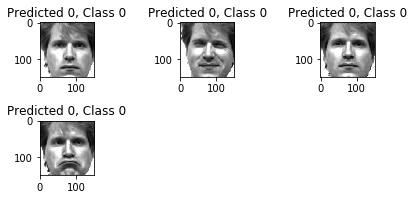

In [208]:
correct = np.where(predicted_classes==y_test)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(150,150), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

Found 30 incorrect labels


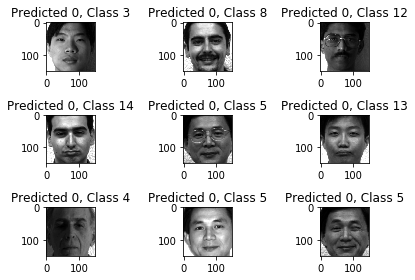

In [209]:
incorrect = np.where(predicted_classes!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(150,150), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

In [210]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.12      1.00      0.21         4
     Class 1       0.00      0.00      0.00         1
     Class 2       0.00      0.00      0.00         2
     Class 3       0.00      0.00      0.00         4
     Class 4       0.00      0.00      0.00         3
     Class 5       0.00      0.00      0.00         3
     Class 6       0.00      0.00      0.00         2
     Class 7       0.00      0.00      0.00         3
     Class 8       0.00      0.00      0.00         3
     Class 9       0.00      0.00      0.00         1
    Class 10       0.00      0.00      0.00         1
    Class 11       0.00      0.00      0.00         2
    Class 12       0.00      0.00      0.00         3
    Class 13       0.00      0.00      0.00         1
    Class 14       0.00      0.00      0.00         1

    accuracy                           0.12        34
   macro avg       0.01      0.07      0.01        34
weighted avg       0.01   

/home/hantz_angrand72/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Credit Data Camp
https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python
    